In [162]:
import pandas as pd
import sklearn.linear_model
import sklearn.ensemble
import sklearn.model_selection
import sklearn.metrics
import matplotlib.pyplot as plt
import numpy as np

In [97]:
simplest = pd.read_csv("data/simplest.csv")

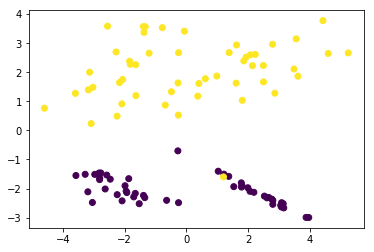

In [98]:
plt.scatter(
    simplest.x1,
    simplest.x2,
    c = simplest.y
)

In [99]:
simplest_features = simplest.iloc[:,:-1]

In [100]:
simplest_label = simplest.y

In [101]:
simplest_features_train, simplest_features_test, simplest_label_train, simplest_label_test = sklearn.model_selection.train_test_split(
    simplest_features,
    simplest_label,
    test_size=0.33,
    random_state=11
)

In [102]:
p = sklearn.linear_model.Perceptron()
p.fit(
    simplest_features_train,
    simplest_label_train
)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [114]:
sklearn.metrics.confusion_matrix(
    simplest_label_test,
    p.predict(simplest_features_test)
)

array([[17,  0],
       [ 0, 16]], dtype=int64)

In [104]:
p.coef_

array([[1.10152364, 6.66922198]])

In [105]:
p.intercept_

array([4.])

https://stackoverflow.com/questions/31292393/how-do-you-draw-a-line-using-the-weight-vector-in-a-linear-perceptron

In [136]:
slope = -( p.intercept_ / p.coef_[0][1] ) / ( p.intercept_ / p.coef_[0][0] )  
intercept = -p.intercept_ / p.coef_[0][1]

In [139]:
db_x = np.array(
    [simplest_features_test.x1.min(),
    simplest_features_test.x1.max()]
)
db_y = slope * db_x + intercept

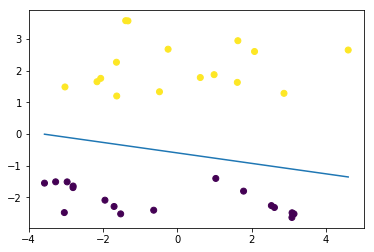

In [140]:
plt.scatter(
    simplest_features_test.x1,
    simplest_features_test.x2,
    c = simplest_label_test
)

plt.plot(
    db_x,
    db_y
)

In [142]:
checkerboard = pd.read_csv("data/checkerboard.csv")

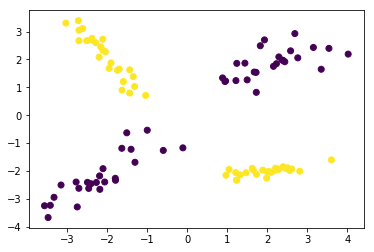

In [143]:
plt.scatter(
    checkerboard.x1,
    checkerboard.x2,
    c = checkerboard.y
)

In [171]:
checkerboard_features = checkerboard.iloc[:,:-1]

In [172]:
checkerboard_label = checkerboard.y

In [173]:
checkerboard_features_train, checkerboard_features_test, checkerboard_label_train, checkerboard_label_test = sklearn.model_selection.train_test_split(
    checkerboard_features,
    checkerboard_label,
    test_size=0.33,
    random_state=11
)

In [174]:
p1 = sklearn.linear_model.Perceptron()
p1.fit(
    checkerboard_features_train,
    checkerboard_label_train
)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [175]:
sklearn.metrics.confusion_matrix(
    checkerboard_label_test,
    p.predict(checkerboard_features_test)
)

array([[ 6,  7],
       [ 8, 12]], dtype=int64)

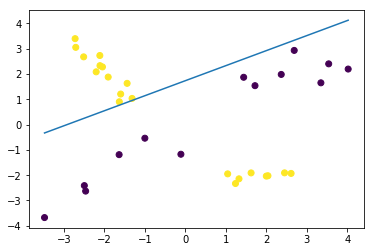

In [176]:
slope = -( p1.intercept_ / p1.coef_[0][1] ) / ( p1.intercept_ / p1.coef_[0][0] )  
intercept = -p1.intercept_ / p1.coef_[0][1]
db_x = np.array(
    [checkerboard_features_test.x1.min(),
    checkerboard_features_test.x1.max()]
)
db_y = slope * db_x + intercept
plt.scatter(
    checkerboard_features_test.x1,
    checkerboard_features_test.x2,
    c = checkerboard_label_test
)

plt.plot(
    db_x,
    db_y
)

In [177]:
t = sklearn.tree.DecisionTreeClassifier()
t.fit(
    checkerboard_features_train,
    checkerboard_label_train
)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [178]:
sklearn.metrics.confusion_matrix(
    checkerboard_label_test,
    t.predict(checkerboard_features_test)
)

array([[10,  3],
       [ 0, 20]], dtype=int64)

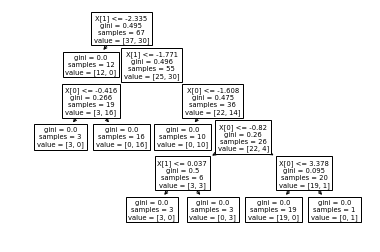

In [180]:
sklearn.tree.plot_tree(t)
plt.show()